We'll go through Principal Component Analysis in terms of the 3 building blocks:
1. Mean Centering
2. Covariance Matrix
3. Eigendecomposition

Finally, we'll see how everything comes into the picture of

4. Dimensionality Reduction

## 0. Create Data
First, let's create some mock data, so we could visualize what each step does along the way of our implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set random seed for reproducibility
np.random.seed(100)

# number of points we want in our data
n_points = 100

# we'll go with 2-dimensional data for easier visualization
data = np.random.randn(2, n_points)

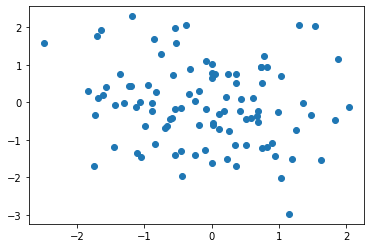

In [3]:
plt.scatter(*data)
plt.show()

Not quite the shape of data we want. Let's squish and squash the data a little bit to get it into the shape we want.

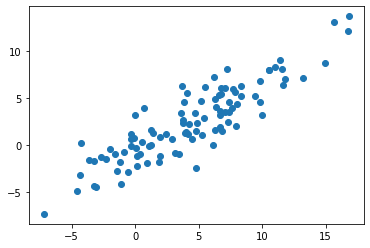

In [4]:
# random matrix to transform (rotate & squish) our data
transform_matrix = np.array([[5,3], [2,3]])

# move the data so that the data is not centered at (0,0)
x_translate = 5
y_translate = 3
data = np.dot(data.T, transform_matrix).T + np.array([[x_translate], [y_translate]])

# plot
plt.scatter(*data)
plt.show()

There we go! The data now looks much more familiar, right?

# 1. Center Data
Mean-centering the data is an integral step because PCA is a variance-based technique which seeks to find the directions of maximum variance in the data.

Centering the data is easy:
1. Compute the mean of each variable. This is equivalent to finding the mid points of our data at the x- and y-axis.
2. Subtract the mean

In [5]:
# let's transpose the data to get it into a shape we are used to: (observations, columns)
data = data.T
data.shape

(100, 2)

In [6]:
# mean
col_mean = data.mean(axis=0)

# subtract mean
data_centered = data - col_mean

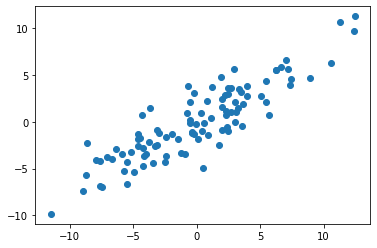

In [7]:
# plot
plt.scatter(*data_centered.T)
plt.show()

See? Our data is now centered at the origin (0, 0). How easy.

## 2. Covariance Matrix
The covariance matrix plays an important role in estimating the relationship between variables and the variation in the data.

By computing the covariance matrix, we get a summary of the relationships within (variance) & between (covariance) variables.
- compute the n x n covariance matrix that looks like this:
  $\begin{pmatrix} Var(x) & Cov(x,y) \\ Cov(x,y) & Var(y)\end{pmatrix}$
- diagonal entries are the variance of every column
- off-diagonal entries are the pairwise covariance between 2 columns
- in case you forgot the formula for population variance and covariance
  - $Var(x) = \frac{\Sigma(x_i - \bar{x})^2}{n}$
  - $Cov(x,y) = \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{n}$
  - for sample variance & covariance, simply substitute $n$ with $n-1$

In [8]:
# instead of the matrix by hand, there's a handy function in numpy that does exactly this
cov_matrix = np.cov(data_centered.T) # by default np.cov uses ddof=1
cov_matrix

array([[24.94910452, 17.56856261],
       [17.56856261, 15.80606432]])

In [9]:
# let's compute var(x) and var(y) for checking sake
# we use ddof=1 for sample variance
var_x = data_centered[:,0].var(ddof=1) 
var_y = data_centered[:,1].var(ddof=1)
print(var_x, var_y)

24.94910452436487 15.806064315898084


## 3. Eigendecomposition
From the covariance matrix, we then find the eigenvectors and eigenvalues.

A quick refresher on what these eigen-stuff are:
- eigenvectors: vectors that change by a scalar factor when a linear transformation by a matrix (i.e. the covariance matrix) is applied to it
- eigenvalues: the scala factor or magnitude by which the eigenvector is scaled

These eigen-stuff can be represented by this equation: $A v = \lambda v$,\
where $A$ is the matrix, $v$ the eigenvector and $\lambda$ the eigenvalue. 

Essentially what the equation says is: we apply a matrix transformation $A$ on $v$ such that $v$ only scaled by some scalar $\lambda$ factor.


**What does eigendecomposition do in PCA, you ask.**

**Short answer**: It is used to determine the principal components of the data.

**Long answer**: Since the covariance matrix summarizes the relationship between variables, by decomposing the covariance matrix into eigenvectors and eigenvalues, they tell us the direction and magnitude of variance of our data.
- An eigenvector tells us the **main direction** in which the data is spread
- An eigenvalue tells us the **how much** the data is spread in that direction. A better way I'd like to understand this is **how important** it is.

Now how do we compute these eigen-things? Linear algebra time baby.

Here's the equation:

$A = \Phi \Lambda \Phi^{T}$ where,
- $A$ is the matrix we are trying to decompose
- $\Phi$ is an n x n matrix of n eigenvector columns
- $\Lambda$ is a diagonal matrix with diagonal entries as the eigenvalues

Wait, this is not a linear algebra class. We're trying understand the concepts and intuitions here, we're not math nerds doing proofs and derivations here (duh). Let's stop right here. We'll leave the dirty work of derivation to Numpy.

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [11]:
eigenvectors, eigenvalues


(array([[ 0.79114614, -0.61162716],
        [ 0.61162716,  0.79114614]]),
 array([38.53118429,  2.22398455]))

Eigenvectors are orthogonal, which is just a fancy way of saying they are perpendicular to each other.

How do we know? By taking the inner product of the eigenvectors, the result should be 0.

In [12]:
# dot product
np.dot(eigenvectors[:, 0],eigenvectors[:, 1])

0.0

Let's visualize these eigen-stuff!

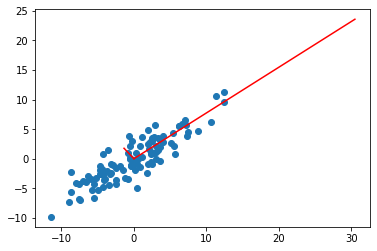

In [13]:
# plot
plt.scatter(*data_centered.T)

# first eigenvector
eigen_vec_1 = eigenvectors[:, 0]*eigenvalues[0]
plt.plot([0, eigen_vec_1[0]], [0, eigen_vec_1[1]], color='red')

# second eigenvector
eigen_vec_2 = eigenvectors[:, 1]*eigenvalues[1]
plt.plot([0, eigen_vec_2[0]], [0, eigen_vec_2[1]], color='red')
plt.show()


In case you are wondering why the two vectors do not look quite perpendicular to each other in the plot, it's just because the x-axis and y-axis scales are a little different.

Now what do we do after finding out the eigenvectors? 

We'll use the eigenvectors as the new axes for our data. Essentially, we rotate our data to fit these new axes, which is simply a matrix multiplication between the original data and the eigenvector matrix

FYI, in linear algebra, there's a unnecessarily fancy term for this: change of basis.

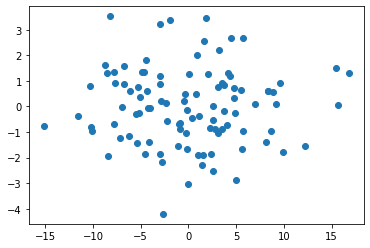

In [14]:
data_centered_rotate = data_centered@eigenvectors
plt.scatter(*data_centered_rotate.T)
plt.show()

We can take this new data, which has been transformed into some new basis, and transform it back to it's original form, essentially reconstructing our data from a transformed space.

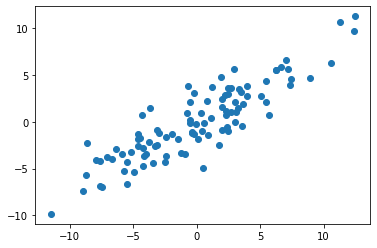

In [15]:
data_centered_reconstruct = data_centered_rotate@eigenvectors.T
plt.scatter(*data_centered_reconstruct.T)
plt.show()

## 4. Dimensionality Reduction
PCA is all about reducing our data's dimensionality, we know that. But how do all of these crap above relate to dimensionality reduction?

Here comes the juice. Lo and behold.

We've talk about how eigenvectors are the principal components of our data and how eigenvalues basically indicates how representative a principal component is of our data.
By looking at the eigenvalues, we can know which principal components are more important in capturing the information in our data. Therefore, by selecting the more important principal components, we should be able to reconstruct much of the original data. That's how dimensionality reduction works.

In [16]:
eigenvalues

array([38.53118429,  2.22398455])

By looking at the eigenvalues, we can tell right away that the first principal component is far more important than the second one.

In fact, there's a very easy method to quantify how much information each principal component captures:

$ \text{Explained Variance Ratio of  } PC_k = \frac{\lambda_k} {\lambda_1 + \ldots + \lambda_n}$

In [17]:
eigenvalues[0]/eigenvalues.sum()

0.9454306136759961

Let's take only the first principal component.

If we do the math, it has an explained variance ratio of ~95%, meaning we should recover 95% of the information by using only 1 principal component.

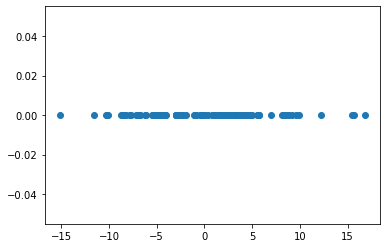

In [18]:
# project our data to the basis of the first PC
data_centered_rotate = data_centered@eigenvectors[:,0]
plt.scatter(data_centered_rotate, [0]*len(data_centered_rotate))
plt.show()

Since we take only 1 principal component, our project is just 1-dimensional, i.e. a line.

Now, let's transform our data from the projection space back to the original space.

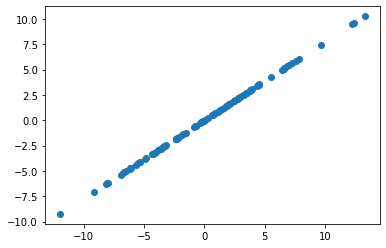

In [19]:
# recontruct data from transformed space
data_centered_reconstruct = data_centered_rotate.reshape(-1,1)@eigenvectors[:,0].reshape(1,-1)
plt.scatter(*data_centered_reconstruct.T)
plt.show()

As we can see, the data reconstructed from the first principal component is able to preserve the primary trend/pattern of the original data.

And there we have it, dimensionality reduction via Principal Component Analysis. PCA is a very powerful technique in data science. It helps in identifying the underlying structure and pattern in high dimensional data and reducing it to lower dimensional representation without losing much information. It can be used in:
- Noise reduction: as we can see in the example by applying PCA we essentially get rid of the noise and keep only the main trend/pattern of the data
- Visualization: we are low dimensional species, we cannot visualize more than 3 dimensions. With PCA we can reduce high dimensional data into lower dimensions such that we can visualize the data and better understand it
- Storage: dimensionality reduction is essentially data compression
- Performance: reduce the size of data we feed into machine learning models allows for faster training

